In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
datas = pd.read_csv('600905.csv')
# weight = [22, 40, 21, 4, 2]
# pred = [63.2917232 , 63.56278105, 63.83383889, 64.10489674, 64.37595459]
# weight = [33, 64, 50, 4, 5]
# pred = [116.49560157, 117.09300495, 117.69040833, 118.28781171, 118.8852151]
weight = [15, 46, 35, 2, 5]
pred = [71.84670162, 72.28215977, 72.71761792, 73.15307606, 73.58853421]
seq = datas['BSI6'] * weight[0] + datas['openNR'] * weight[1] + datas['closeNR'] * weight[2] + datas['highNR'] * weight[3] + datas['lowNR'] * weight[4]
seqs = pd.DataFrame(seq)
seqs.columns = ['seq']
new_seq = pd.DataFrame(pred)
new_seq.columns = ['seq']
seqs = seqs.append(new_seq)
seqs = seqs.reset_index()
seqs = seqs.drop(['index'], axis = 1)
seqs.tail()

,seq
60,71.846702
61,72.282160
62,72.717618
63,73.153076
64,73.588534


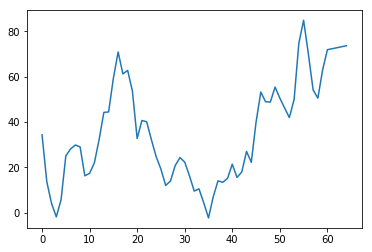

In [3]:
plt.plot(seqs)
plt.savefig('pic/600905_fin_BSI6_index_pred')
plt.show()

In [4]:
MA10 = []
MA5 = []
for day in range(len(seqs['seq'])):
    if day < 4:
        MA5.append(0)
        MA10.append(0)
    elif day < 9:
        MA5.append(seqs.loc[day - 4:day + 1].mean().values[0])
        MA10.append(0)
    else:
        MA5.append(seqs.loc[day - 4:day + 1].mean().values[0])
        MA10.append(seqs.loc[day - 9:day + 1].mean().values[0])
MA = pd.DataFrame()
MA['MA5'] = MA5
MA['MA10'] = MA10
MA.tail()

,MA5,MA10
60,63.618805,61.749537
61,64.076831,64.161904
62,67.247620,66.997561
63,71.095830,69.155002
64,72.717618,68.600174


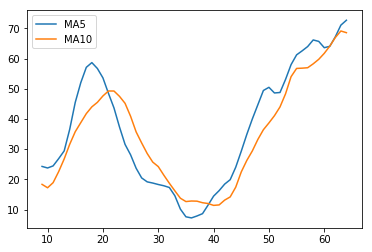

In [5]:
plt.plot(MA['MA5'].loc[9:], label='MA5')
plt.plot(MA['MA10'].loc[9:], label='MA10')
plt.legend(loc='best')
plt.savefig('pic/600905_fin_BSI6_index_EMA')
plt.show()

In [6]:
flag = MA['MA5'] - MA['MA10']
flag = flag.apply(lambda x: 1 if x >= 0 else 0)

fork_gold = []
fork_dead = []
last = flag[10]
for day in range(11, len(flag)):
    if flag[day] != last:
        if flag[day] == 0:
            fork_dead.append(day)
        else:
            fork_gold.append(day)
        last = flag[day]
print('金叉点: ', fork_gold)
print('死叉点: ', fork_dead)

金叉点:  [40, 62]
死叉点:  [21, 61]


In [7]:
import tushare as ts
fin_datas = ts.get_hist_data('600905', start='2021-10-11', end='2022-01-10')
fin_datas = fin_datas.reset_index()
fin_datas = fin_datas.sort_values('date',ascending=True)
fin_datas = fin_datas.reset_index()
fin_datas = fin_datas.drop(['index', 'date'], axis = 1)
fin_datas

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
0,7.22,7.25,6.84,6.70,6123323.00,-0.30,-4.20,7.174,7.072,6.669,8534272.30,11166295.25,9889276.25,8.81
1,6.70,6.94,6.73,6.45,6047445.00,-0.11,-1.61,7.028,7.083,6.680,7171635.30,10201793.65,9285817.60,8.70
2,6.64,6.64,6.49,6.36,4431096.50,-0.24,-3.57,6.914,7.004,6.686,6291281.80,9061489.70,8883987.98,6.38
3,6.41,6.69,6.53,6.33,4498129.00,0.04,0.62,6.746,6.961,6.685,5460974.00,7970881.50,8573383.63,6.47
4,6.48,6.75,6.68,6.43,4146097.75,0.15,2.30,6.654,6.918,6.692,5049218.25,7173611.78,8191554.66,5.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,7.57,7.69,7.43,7.41,4034471.25,-0.08,-1.06,7.396,7.424,7.268,4577986.80,5541350.35,6329391.93,4.71
61,7.41,7.43,7.20,7.11,4646892.00,-0.23,-3.10,7.342,7.421,7.294,4525999.40,5692952.45,6404435.46,5.42
62,7.12,7.25,7.19,7.09,3178437.00,-0.01,-0.14,7.330,7.431,7.311,4199822.30,5631528.85,6378340.33,3.71
63,7.16,7.21,7.10,7.09,3227437.75,-0.09,-1.25,7.286,7.393,7.315,4072997.80,5072708.83,6231469.99,3.77


In [8]:
MA_old = fin_datas[['ma5', 'ma10']]
MA_old = MA_old.reset_index()
MA_old = MA_old[['ma5', 'ma10']]
MA_old.columns = ['MA5', 'MA10']
MA_old.tail()

,MA5,MA10
60,7.396,7.424
61,7.342,7.421
62,7.330,7.431
63,7.286,7.393
64,7.192,7.320


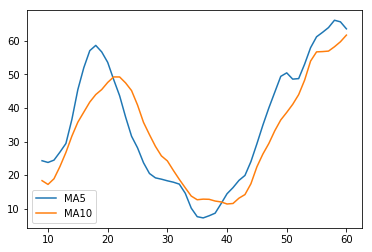

In [9]:
plt.plot(MA['MA5'].loc[9:60], label='MA5')
plt.plot(MA['MA10'].loc[9:60], label='MA10')
plt.legend(loc='best')
plt.savefig('pic/600905_fin_EMA')
plt.show()

In [10]:
flag_old = MA_old['MA5'] - MA_old['MA10']
flag_old = flag_old.apply(lambda x: 1 if x >= 0 else 0)

fork_gold_old = []
fork_dead_old = []
last = flag_old[10]
for day in range(11, len(flag_old)):
    if flag_old[day] != last:
        if flag_old[day] == 0:
            fork_dead_old.append(day)
        else:
            fork_gold_old.append(day)
        last = flag_old[day]
print('金叉点: ', fork_gold_old)
print('死叉点: ', fork_dead_old)

金叉点:  [39]
死叉点:  [21, 60]


In [11]:
price = fin_datas['close'].tolist()
earn = price[fork_dead[-1]] - price[fork_gold[0]]
print('新每股收益: ', earn)
earn_old = price[fork_dead_old[-1]] - price[fork_gold_old[0]]
print('旧每股收益: ', earn_old)

新每股收益:  0.4500000000000002
旧每股收益:  0.5699999999999994
